Joshua Haas - 2023 
Multiagent Systems Individual Assigment 



#### 1 Monte Carlo Simulation (30%)
The COVID scare was a wake-up call, highlighting the vulnerability of our hyper-connected modern
world to the threat of pandemics. Now that the COVID urgency has passed, governments across
the globe are rushing to update their emergency action plans and disaster scripts.
As part of this effort, you’ve been hired by a medical team that has been tasked with developing
fast procedures to detect a blood-borne virus. Since these tests need to be administered to large
1
groups in the population, and testing resources are limited, the medics have come up with the
following procedure. They started from the assumption that they need to test N blood samples
(of as many different individuals) and that N is large (e.g. N = 106
). Furthermore, the probability
that an individual is infected is p, where p is relatively small, e.g. p < 0.1.
Based on these assumptions they propose the following procedure to minimise the number
of tests they have to run: Rather than testing each sample individually, take a batch of k samples
and mix them. Then this mixed sample is tested for the presence of the viral antigen:
• If the mixed sample tests negative (i.e. no viral antigen is detected), then all the individual
samples were clear, and you therefore have the result for all k individual samples that went
into the batch.
• If the mixed sample tests positive (i.e. the viral antigen is present indicating infection), one
needs to retest all individual samples that went into the batch, in order to find out which
individual(s) are actually infected.
Questions
1. Use Monte Carlo simulation to estimate the optimal batch size k (i.e. the one that minimises
the expected number of tests) for a given value of p where p can take values between 10−1
and 10−4
.
2. In order to convince your superiors that this a good investment, quantify the expected
reduction in workload (compared to testing all samples individually).

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import beta
import pandas as pd
import numpy as np
import random
from collections import defaultdict


In [ ]:
max_k = 202
pop = 10**6
number_pop = 10

def monte_carlo_simulation(p, max_k):
    batch_dict = defaultdict(list)

    for iteration in range(number_pop):
        population = np.random.uniform(low=0, high=1, size=pop)

        for k in range(2, max_k):
            batch_size = k
            number_batches = pop // batch_size
            remainder_batch = pop % batch_size
            positive_batches = 0 

            if remainder_batch != 0: 
                number_batches += 1 

            start = 0
            for batch_index in range(number_batches):
                if batch_index == number_batches - 1 and remainder_batch != 0:
                    end = start + remainder_batch
                else:
                    end = start + batch_size

                batch = population[start:end]
                start = end

                if any(value <= p for value in batch):
                    positive_batches += 1
            batch_dict[k].append(positive_batches*k+number_batches)
            averages = {k: sum(values)/number_pop for k, values in batch_dict.items()}

    
    return averages

p_list = [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005, 0.0002, 0.0001]
results = []
for p in p_list: 
    mc = monte_carlo_simulation(p, max_k)
    optimal_k = min(mc, key=mc.get)
    optimal_value = mc[optimal_k]
    results.append((p, optimal_k, optimal_value))



### Exercise 1.2

In [31]:
# Printing the results in a structured format
print("Probability (p) | Optimal Batch Size (k) | Minimum Average Tests")
print("-" * 60)
for p, k, value in results:
    print(f"{p:<15} | {k:<23} | {value}")

If the p-value is 0.1: In total 594017  Tests are needed
If the p-value is 0.05: In total 426380  Tests are needed
If the p-value is 0.025: In total 305007  Tests are needed
If the p-value is 0.001: In total 62585  Tests are needed


In [33]:
for i in dic_number_test.items():
    a = i[1]
    print(f"For the p-value {a[1]}: In total {10**6 - round(a[0])} Test are saved through the batches")

For the p-value 0.1: In total 405983 Test are saved through the batches
For the p-value 0.05: In total 573620 Test are saved through the batches
For the p-value 0.025: In total 694993 Test are saved through the batches
For the p-value 0.001: In total 937415 Test are saved through the batches


### Exercise 2.1 


In [32]:
number_of_simulations = 10000
alpha = 1 
beta = 1
mean_list = []
variance_list =[]
iteration = []
p = 0.5
for i in range(number_of_simulations):    
    mean = 1 / (1 + (beta/alpha))
    mean_list.append(mean)
    variance = (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))
    variance_list.append(variance)
    
    r = np.random.binomial(1, p,)
    if r == 1: 
        alpha = alpha + 1
    else: 
        beta = beta + 1
    iteration.append(i)


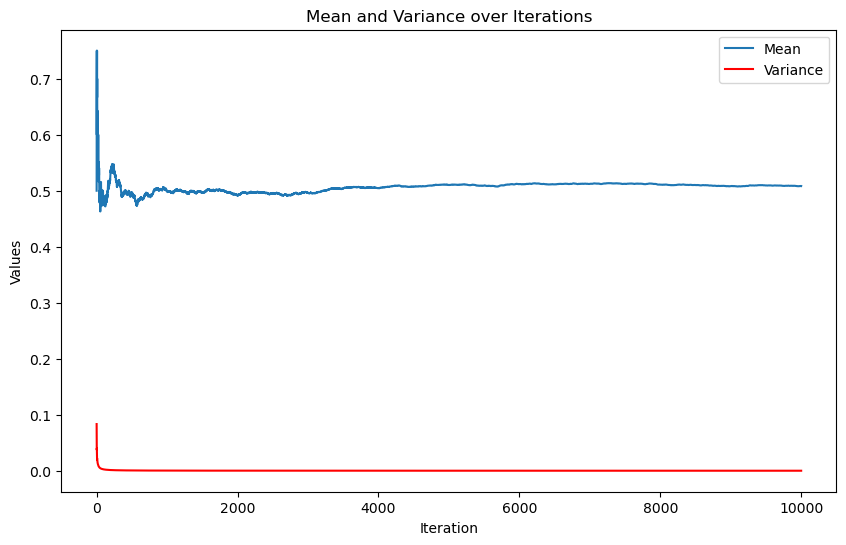

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(iteration, mean_list, label='Mean')
plt.plot(iteration, variance_list, label='Variance', color='red')

plt.xlabel('Iteration')
plt.ylabel('Values')
plt.title('Mean and Variance over Iterations')
plt.legend()

plt.show()

### Exercise 2.2

In [57]:
# Number of arms
K = 3
# Set three p values 
p = [random.uniform(0,1) for i in range(3)]

# Initialize alpha and beta parameters for each arm
alpha_params = np.ones(K)
beta_params = np.ones(K)

# Thompson sampling function for K-armed bandit problem
def thompson_sampling(alpha_params, beta_params,K, p, trials=100):
    # Store the history of chosen arms and rewards
    p = p 
    chosen_arms = []
    rewards = []
    alpha = []
    beta = []
    for _ in range(trials):
        # Sample from the beta distribution for each arm
        sampled_theta = [np.random.beta(a,b) for a, b in zip(alpha_params, beta_params)]
        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        chosen_arms.append(chosen_arm)
        
        reward = np.random.binomial(1, p=p[chosen_arm])  # p=0.5 is a placeholder
        rewards.append(reward)
        alpha.append(alpha_params[chosen_arm])
        beta.append(beta_params[chosen_arm])
        
        # Bayesian update rule 
        alpha_params[chosen_arm] += reward
        beta_params[chosen_arm] += 1 - reward

    return chosen_arms, rewards, alpha_params, beta_params,alpha, beta,p

# Run the Thompson sampling
chosen_arms, rewards, alpha_params, beta_params,alpha,beta, p = thompson_sampling(alpha_params, beta_params,K,p)

# Output the final alpha and beta parameters
print("Final alpha parameters:", alpha_params)
print("Final beta parameters:", beta_params)


Final alpha parameters: [12. 10. 22.]
Final beta parameters: [19. 13. 30.]


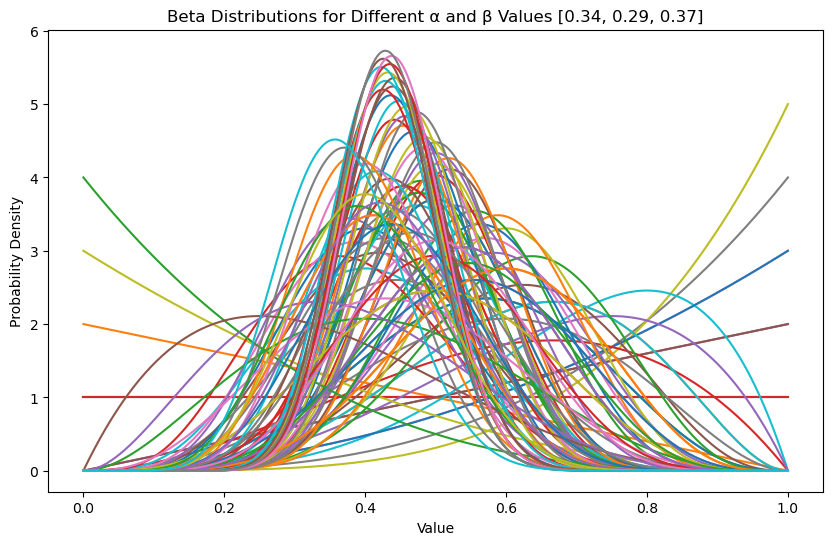

In [59]:
from scipy.stats import beta as beta_dist  # Renaming to avoid conflict

def plot_beta_distributions_from_lists(alpha_values, beta_values,p):
    plt.figure(figsize=(10, 6))

    # Generating a range of x values between 0 and 1
    x_values = np.linspace(0, 1, 500)

    # Iterating through the alpha and beta values
    for i in range(len(alpha_values)):
        alpha = alpha_values[i]
        beta_val = beta_values[i]

        # Calculating the probability density function for the Beta distribution
        y_values = beta_dist.pdf(x_values, alpha, beta_val)

        # Plotting the Beta distribution for this alpha and beta pair
        plt.plot(x_values, y_values, label=f'α={alpha}, β={beta_val}')

    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Beta Distributions for Different α and β Values {[round(p,2) for p in p]}')
    plt.show()



plot_beta_distributions_from_lists(alpha, beta,p)


### Exercise 2.3

Perform numerical experiments in which you compare Thompson sampling with the UCB.
Use total regret (provide the precise definition that you’re using) as your performance
criteria. For UCB, experiment with different values of the hyperparameter c. The fact
that, for Thompson sampling, you don’t need to specify an hyperparameter, is a distinct
advantage.

In [101]:
# Thompson Sampling 
# Number of arms
K = 3
# Set three p values 
p = [random.uniform(0,1) for i in range(3)]

# Thompson sampling function for K-armed bandit problem
def thompson_sampling(alpha_params, beta_params,K, p, trials=100):
    # Store the history of chosen arms and rewards
    p = p 
    chosen_arms = []
    rewards = []
    expected_regrets = np.array([])

    for _ in range(trials):
        # Sample from the beta distribution for each arm
        sampled_theta = [np.random.beta(a,b) for a, b in zip(alpha_params, beta_params)]
        # Select the arm with the highest sampled value
        chosen_arm = np.argmax(sampled_theta)
        chosen_arms.append(chosen_arm)
        
        reward = np.random.binomial(1, p=p[chosen_arm])  # p=0.5 is a placeholder
        rewards.append(reward)
        
        regret_i = max(p) - p[chosen_arm]
        expected_regrets = np.append(expected_regrets,[regret_i])
        
        # Bayesian update rule 
        alpha_params[chosen_arm] += reward
        beta_params[chosen_arm] += 1 - reward
        

    return chosen_arms, rewards, alpha_params, beta_params, expected_regrets
chosen_arms, rewards, alpha_params, beta_params, expected_regrets = thompson_sampling(alpha_params, beta_params,K,p)
# You calculated the total Loss 

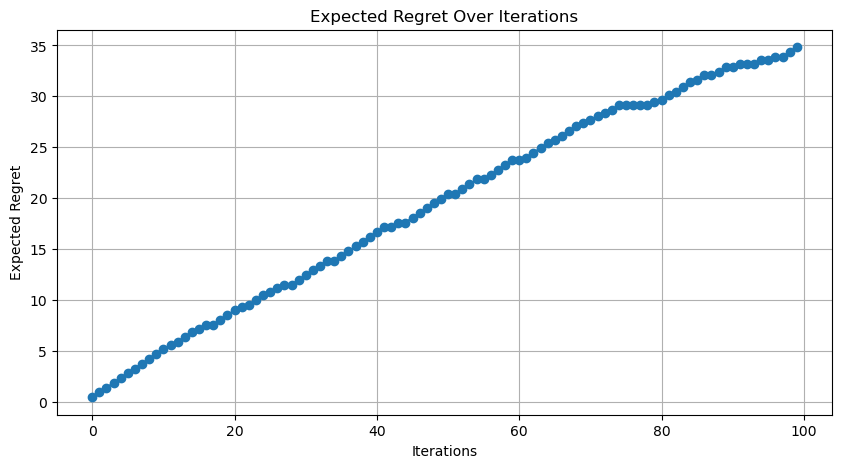

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(expected_regrets.cumsum(), marker='o')
plt.title('Expected Regret Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Expected Regret')
plt.grid(True)
plt.show()

In [146]:
K = 3 
#should be the same 
true_reward = [0.3, 0.1, 0.8]
simul = 1000

def ucb_algorithm(num_arms, rewards, counts, total_count, c=2): 
    ucb_values = [0.0 for _ in range(num_arms)]

    if total_count == 0:
        return random.randint(0,num_arms)
    
    for arm in range(num_arms):
        if counts[arm] == 0: 
            Qa = np.infty
            upper_bound = 0
        else:
            Qa = rewards[arm] / counts[arm]
            upper_bound = np.sqrt((np.log(total_count) / counts[arm]) * c)
        ucb_values[arm] = Qa + upper_bound
    return np.argmax(ucb_values)   

def simulations(simul,k,true_reward):
    rewards = [0.0 for _ in range(k)]
    counts = [0.0 for _ in range(k)]
    total_count = 0
    expected_regrets = np.array([])

    
    for _ in range(simul):
        chosen_arm = ucb_algorithm(k,rewards,counts,total_count)
        rewards[chosen_arm] += np.random.binomial(1,true_reward[chosen_arm]) 
        counts[chosen_arm] += 1
        regret = max(true_reward) - true_reward[chosen_arm]
        expected_regrets = np.append(expected_regrets,[regret])


        total_count += 1
    
    return rewards,expected_regrets

f,g = simulations(simul,K,true_reward)

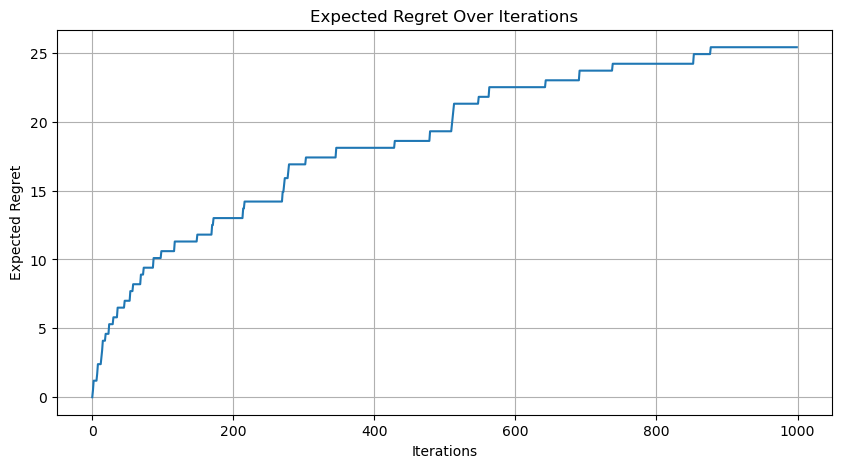

In [149]:
# Specify the C values and plot it for multiple c- values 
plt.figure(figsize=(10, 5))
plt.plot(g.cumsum())
plt.title('Expected Regret Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Expected Regret')
plt.grid(True)
plt.show()

### Exercise 3.1

In [54]:
def initialize_q_table(rows=4, cols=21):
    # Initialize a Q-table for a grid of specified dimensions
    q_table = np.zeros((4, rows * cols))
    return q_table

def choose_action(state, q_table, exploration_rate):
    # Choose an action based on epsilon-greedy algorithm
    if np.random.rand() <= exploration_rate:
        # Explore: select a random action
        return np.random.choice(4)
    else:
        # Exploit: choose the best known action
        return np.argmax(q_table[:, state])

def update_agent_position(current_position, selected_action):
    x, y = current_position
    # Define movement logic based on action
    if selected_action == 0 and x > 0:  # UP
        x -= 1
    elif selected_action == 1 and y > 0:  # LEFT
        y -= 1
    elif selected_action == 2 and y < 20:  # RIGHT
        y += 1
    elif selected_action == 3 and x < 3:  # DOWN
        x += 1
    return (x, y)

def calculate_state(current_position):
    x, y = current_position
    # Calculate the state index for the Q-table
    state_index = 21 * x + y
    return state_index

def assess_reward(state):
    # Determine reward and endgame status
    if state == 83:
        return 20, True  # Goal state
    elif 64 <= state <= 82:
        return -100, True  # Cliff
    else:
        return -1, False  # Regular state
    return reward, game_end

def modify_q_table(q_table, state, action, reward, next_state_max, discount_factor=0.9, learning_rate=0.5):
    # Update Q-table with new Q value for a state-action pair
    update_q_value = q_table[action, state] + learning_rate * (reward + (discount_factor * next_state_max) - q_table[action, state])
    q_table[action, state] = update_q_value
    return q_table

def mark_visited_path(environment, agent_position):
    posY, posX = agent_position
    environment[posY, posX] = 1
    return environment

def perform_q_learning(episodes=1000, discount_factor=0.9, learning_rate=0.5, epsilon=0.1):
    rewards, steps = [], []
    q_table = initialize_q_table()
    initial_position = (3, 0)

    for episode in range(episodes):
        environment = np.zeros((4, 21))
        agent_position = initial_position
        environment = mark_visited_path(environment, agent_position)

        total_reward, total_steps = 0, 0
        game_over = False

        while not game_over:
            state = calculate_state(agent_position)
            action = choose_action(state, q_table, epsilon)
            agent_position = update_agent_position(agent_position, action)

            # Helps to vizaualize the path of the agent
            total_steps += 1
            environment = mark_visited_path(environment, agent_position)

            next_state = calculate_state(agent_position)
            reward, game_over = assess_reward(next_state)

            total_reward += reward
            max_next_state_val = np.amax(q_table[:, next_state])
            q_table = modify_q_table(q_table, state, action, reward, max_next_state_val, discount_factor, learning_rate)

        rewards.append(total_reward)
        steps.append(total_steps)


        print(f"Episode {episode + 1}: Agent's Path")
        print(environment)

    return q_table, rewards, steps

# Run the Q-learning algorithm
q_learning_results = perform_q_learning()

Episode 1: Agent's Path
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 2: Agent's Path
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 3: Agent's Path
[[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 4: Agent's Path
[[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [44]:

def run_sarsa_learning(total_episodes=500, gamma=0.9, alpha=0.5, epsilon=0.1):
    q_table = initialize_q_table()
    accumulated_rewards = []
    steps_per_episode = []

    for episode in range(total_episodes):
        environment = np.zeros((4, 21))
        current_position = (3, 0)  # Start position
        environment = mark_visited_path(environment, current_position)

        is_game_over = False
        total_reward = 0
        total_steps = 0

        current_state = calculate_state(current_position)
        current_action = choose_action(current_state, q_table, epsilon)

        while not is_game_over:
            # Move to new state
            new_position = update_agent_position(current_position, current_action)
            environment = mark_visited_path(environment, new_position)
            total_steps += 1

            # Get next state and reward
            next_state = calculate_state(new_position)
            reward, is_game_over = assess_reward(next_state)
            total_reward += reward

            # Choose next action based on policy
            next_action = choose_action(next_state, q_table, epsilon)

            # SARSA update
            future_value = q_table[next_action, next_state]
            q_table = modify_q_table(q_table, current_state, current_action, reward, future_value, gamma, alpha)

            # Update state and action
            current_position = new_position
            current_state = next_state
            current_action = next_action

        accumulated_rewards.append(total_reward)
        steps_per_episode.append(total_steps)

        #if episode >= total_episodes - 2:
        print(f"Episode {episode + 1}: Path Taken by Agent")
        print(environment)

    return q_table, accumulated_rewards, steps_per_episode

# Example use of the function
q_table, rewards, steps = run_sarsa_learning()


Episode 1: Path Taken by Agent
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 2: Path Taken by Agent
[[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 3: Path Taken by Agent
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 4: Path Taken by Agent
[[0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1

### Exercise 3.2 Train with different epsilons values

In [55]:
for i in range(0.1,1,0.1):
    q_table, rewards, steps = perform_q_learning(epsilon=i)
# Data visualization


Episode 1: Agent's Path
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 2: Agent's Path
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 3: Agent's Path
[[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Episode 4: Agent's Path
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.

### Exercise 3.3 Add the snake pit

In [50]:
def assess_reward(state):
    # Determine reward and endgame status
    if state == 83:
        return 20, True  # Goal state
    elif 64 <= state <= 82:
        return -100, True  # Cliff
    elif state == 41 or state == 62:
        return -100, False  # Snake pit
    else:
        return -1, False  # Regular state

#q_table, rewards, steps = perform_q_learning()

TypeError: run_sarsa_learning() got an unexpected keyword argument 'exploration_rate'